# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
df=pd.read_csv('Dataset .csv')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Data Preprocessing 

In [4]:
df.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Currency', 'Rating color', 'Rating text'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Longitude             9551 non-null   float64
 1   Latitude              9551 non-null   float64
 2   Cuisines              9542 non-null   object 
 3   Average Cost for two  9551 non-null   int64  
 4   Has Table booking     9551 non-null   object 
 5   Has Online delivery   9551 non-null   object 
 6   Is delivering now     9551 non-null   object 
 7   Switch to order menu  9551 non-null   object 
 8   Price range           9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
 10  Votes                 9551 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 820.9+ KB


In [6]:
df= pd.get_dummies(df, columns=['Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Columns: 1838 entries, Longitude to Switch to order menu_No
dtypes: float64(3), int64(3), uint8(1832)
memory usage: 17.1 MB


# Splitting Data

In [9]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [23]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.09026845310047096


In [17]:
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.960340891633578


# Plotting

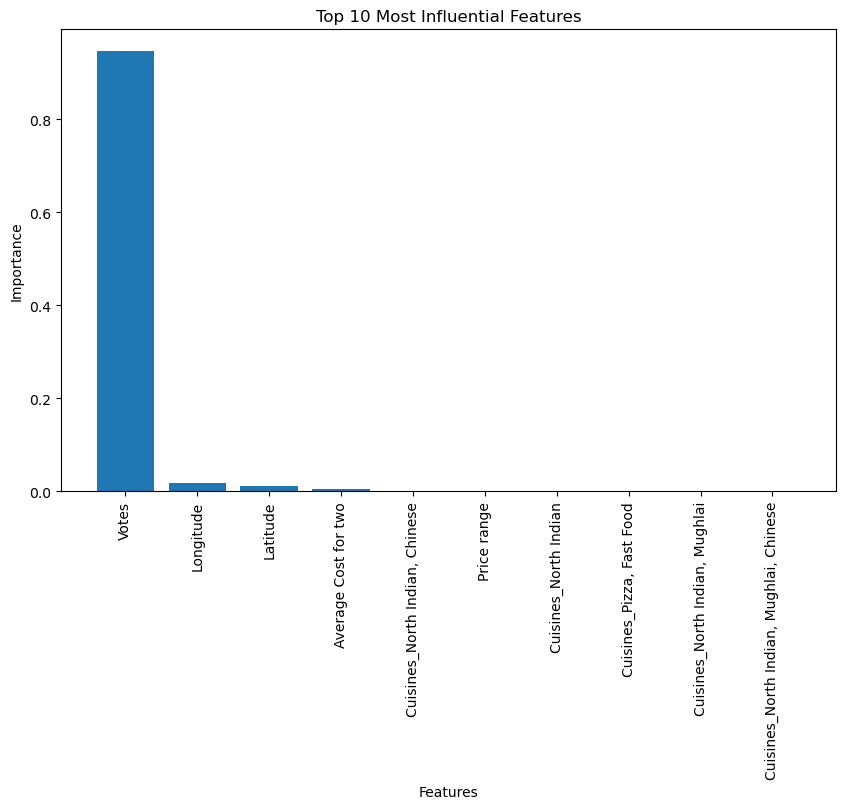

In [25]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the top 10 most influential features
plt.figure(figsize=(10,6))
plt.title('Top 10 Most Influential Features')
plt.bar(range(10), importances[indices][:10], align='center')
plt.xticks(range(10), [features[i] for i in indices][:10], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()